In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 형태소 분석: KoNLPy 사용

### 형태소 분석기 종류
*  Hannanum - KAIST 말뭉치를 이용해 생성된 사전
*  Kkma - 세종 말뭉치를 이용해 생성된 사전 (꼬꼬마)
*  Komoran- Java로 쓰여진 오픈소스 한글 형태소 분석기
*  Twitter(Okt) - 오픈소스 한글 형태소 분석기
*  Mecab - 세종 말뭉치로 만들어진 CSV형태의 사전
*  bareun - 한국언론진흥재단이 딥러닝 방식으로 만든 형태소 분석기

### 품사 태깅(tag): 형태소별로 구분하고 마크업

### 명사 추출: 문장의 주성분 요소인 명사만 추출. 워드클라우드 전단계 작업.

형태소 분석기 비교: https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/

한국어 품사 태그 비교: https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [ ]:
! pip install konlpy           # konlpy 라이브러리 설치하기.
                               # konlpy는 한국어 분석용이므로 google colab에 설치돼 있지 않음.
                               # 그러나 konlpy 사용을 위해 해야 하는 java 설치와 경로 지정 등은 colab에서 하지 않아도 됨.
from konlpy.tag import *       # konlpy.tag 모듈에 있는 모든 함수 불러오기. 이 가운데 Hannanum도 있음.

okt= Okt()               # Okt() 기능을 하는 객체 okt 할당
# kkma = Kkma()                # Kkma 등 다른 형태소 분석기 사용 가능

In [ ]:
okt.pos("철수는 파이썬을 열심히 학습합니다", norm=True, stem=True)      #형태소 태깅, norm: 문법 어긋난 부분 교정, stem: 원형 복구
okt.morphs("철수는 파이썬을 열심히 학습합니다", norm=True, stem=True)   #형태소 분류
okt.nouns("철수는 파이썬을 열심히 학습합니다")    #명사 추출

# 형태소 분석: kiwipiepy 사용
### https://github.com/bab2min/kiwipiepy
(bab2min(Minchul Lee) 개발)

### kiwi 품사 분류표
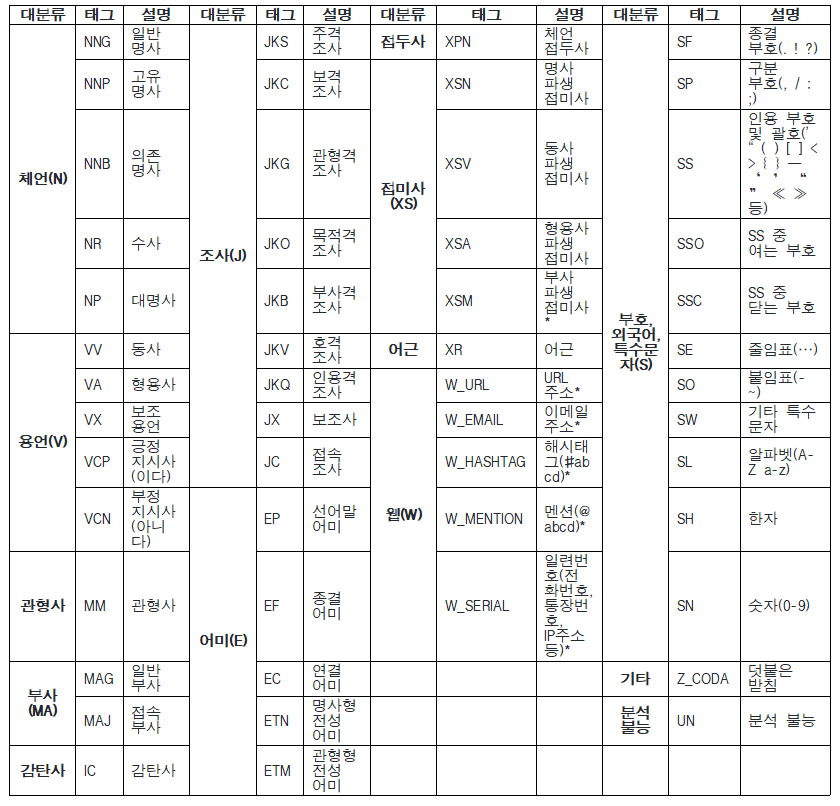

### 패키지 불러오기와 인스턴스 생성

In [ ]:
! pip install kiwipiepy

from kiwipiepy import Kiwi
kiwi = Kiwi()

### 품사 태깅과 추출, 함수화

In [ ]:
text1='철수는 어려운 파이썬 코드를 석달간 열심히 학습해 많은 네이버 뉴스 글을 수집할 수 있었다'
morphs=kiwi.tokenize(text1)
morphs_all=[m[0] for m in morphs]                                            # 모든 품사에 해당하는 형태소 모두 추출
morphs_select=['NNG', 'NNP', 'NP', 'NR', 'VV', 'VX', 'VCP', 'VCN', 'VA','VA-I', 'MM', 'MAG']    # 일반명사, 고유명사, 용언(동사, 형용사 등), 관형사, 일반부사 # 품사 분류표 참조
morphs_main=[m for m in morphs if m[1] in morphs_select]                         # 위 주요 품사 항목 선택
morphs_main=[m[0]+'다' if m[1].startswith('V') else m[0] for m in morphs_main]  # 위 주요 품사에 해당하는 형태소 추출 # stemming(동사-형용사 등 용언은 원형 복구) 적용
morphs_nouns=[m[0] for m in morphs if m[1] in morphs_select[:4]]                # 명사에 해당하는 형태소만 추출
print(morphs_all)
print(morphs_main)
print(morphs_nouns)

In [ ]:
# 함수화: 명사 추출과 주요 품사 추출 수행

! pip install kiwipiepy

import re
from kiwipiepy import Kiwi
kiwi = Kiwi()

def kiwi_tokenize(txt, nouns=True, remove1=False, stopwords=[]):
    '''문자열 txt를 받아 kiwi로 형태소 추출: nouns=명사만 추출 여부, remove1=1음절 토큰 제외 여부, stopwords=불용어 리스트 '''
    try:
        # 정제(cleaning): 비문자숫자 등 노이즈 제거
        txt1=re.sub(r"[^\s가-힣a-zA-Z0-9]", " ", txt)   # re.sub: 문자열 부분 교체. r은 정규표현식 사용한다는 표시.
                                                        # "[^ 가-힣a-zA-Z1-9]"는 한글 영어 숫자 이외의 문자열 의미.
                                                        # txt1=txt1.replace("X", " "):  특정 단어만 삭제할 때에는 replace 함수로 간단히 실행
        # 토큰화(tokenization): 형태소 추출
        morphs=kiwi.tokenize(txt1)
        morphs_all=[m[0] for m in morphs]                # 모든 품사에 해당하는 형태소 모두 추출
        morphs_select=['NNG', 'NNP', 'NP', 'NR', 'VV', 'VX', 'VCP', 'VCN', 'VA','VA-I', 'MM', 'MAG']  # 일반명사, 고유명사, 용언(동사, 형용사 등), 관형사, 일반부사 # 품사 분류표 참조
        # 명사 추출(nou extraction) 여부 선택
        if nouns==True:
            token_lst=[m[0] for m in morphs if m[1] in morphs_select[:4]]
        else:
            token_lst=[m for m in morphs if m[1] in morphs_select]
            # stemming(어간 추출, 동사-형용사 등 용언의 원형 복구) 적용
            token_lst=[m[0]+'다' if m[1].startswith('V') else m[0] for m in token_lst]
        # 1음절 토큰 제외 여부 선택
        if remove1==True:
            token_lst=[t for t in token_lst if len(t)>1 ]
        else:
            pass
        # 불용어(stopwords) 적용: 제외해야 할 토큰들의 집합
        token_lst=[t for t in token_lst if t not in stopwords]
    except:
        token_lst=[]
    return ','.join(token_lst)

In [ ]:
# 함수 연습

txt='''앵커: 오늘은 전국이 대체로 맑고 건조한 가운데 초봄 날씨가 이어지겠습니다.
리포트: 낮 최고 기온은 서울 12도, 대전 13도, 대구 15도로 전국 대부분 지역에서 10도 이상을 나타내겠고,
낮과 밤의 기온 차가 중부 지역은 10도 이상, 남부 내륙은 15도 이상 벌어지겠습니다..'''

stopwords=['앵커', '리포트']
token_result=kiwi_tokenize(txt, nouns=False, remove1=False, stopwords=stopwords)
print(token_result)

### 빈도분석

In [ ]:
from collections import Counter

# 형태소 분석 후 토큰(token) 빈도 탐색
text5='김철수 과장은 어려운 파이썬 웹데이터 수집 코드를 석달간 열심히 학습했고, 그 결과로 김 과장은 많은 네이버 뉴스와 네이버 댓글을 수집할 수 있었다'
tokens=kiwi_tokenize(text5)    # 명사만 추출
print(tokens)
keywords=Counter(tokens.split(',')).most_common(100)      # 빈도 기준 몇위까지 출력
print(keywords)

## 실습: 데이터 불러오기

In [ ]:
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/파이썬특강/문과코딩_021725/naver_news_인공지능.xlsx')  # 자신의 작업 폴더로 수정
df.info()

### 형태소 분석으로 토큰 추출

In [ ]:
stopwords=['앵커', '데스크', '리포트','기자']
df['nouns']=df['text'].apply(lambda x: kiwi_tokenize(x, nouns=True, remove1=True, stopwords=stopwords))

#df.to_excel('/content/drive/MyDrive/파이썬특강/문과코딩_021725/navernews_인공지능_nouns.xlsx')  # 자신의 작업 폴더에 파일명 생성

# 단어 출현 빈도 계산: Counter 함수 활용

In [ ]:
from collections import Counter

tokens_all=','.join(list(df['nouns'])).split(',')
keywords_all=Counter(tokens_all).most_common(100)
print(keywords_all)

df_keywords = pd.DataFrame(keywords_all, columns=["단어", "출현빈도"])   # 단어와 출현빈도 표로 만들기
df_keywords